# Creating the Gene Table
This notebook is copied from the [Pymodulon GitHub repository](https://github.com/SBRG/pymodulon/blob/master/docs/tutorials/creating_the_gene_table.ipynb)

## Get information from GFF files

In [2]:
from pymodulon.gene_util import *
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from pathlib import Path  

First, download the FASTA and GFF files for your organism and its plasmids from NCBI.

Enter the location of all your GFF files here:

In [3]:
#gff_files = [os.path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene/genomic.gff')]
gff_files = [os.path.join('/Users/louxuwen/Desktop/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene/genomic.gff')]

#gene_file = path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene/gene.csv') # Enter metadata filename here
#Kegg_file = path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene/Kegg_ID.csv') # Enter metadata filename here


The following cell will convert all the GFF files into a single Pandas DataFrame for easy manipulation. Pseudogenes have multiple rows in a GFF file (one for each fragment), but only the first fragment will be kept.

In [4]:
keep_cols = ['accession','start','end','strand','gene_name','old_locus_tag','gene_product','ncbi_protein']

DF_annot = gff2pandas(gff_files,index='locus_tag')
DF_annot = DF_annot[keep_cols]

DF_annot

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,
cg0001,BX927147.1,1.0,1575.0,+,dnaA,None,CHROMOSOMAL REPLICATION INITIATOR PROTEIN,CAF18566.1
cg0002,BX927147.1,1594.0,1920.0,-,None,None,hypothetical protein predicted by Glimmer,CAF18567.1
cg0004,BX927147.1,2292.0,3476.0,+,dnaN,None,DNA POLYMERASE III%2C BETA SUBUNIT,CAF18568.1
cg0005,BX927147.1,3585.0,4769.0,+,recF,None,DNA REPAIR AND GENETIC RECOMBINATION PROTEIN,CAF18569.1
cg0006,BX927147.1,4814.0,5302.0,+,None,None,CONSERVED HYPOTHETICAL PROTEIN,CAF18570.1
...,...,...,...,...,...,...,...,...
cg3430,BX927147.1,3280996.0,3281295.0,-,None,None,conserved hypothetical protein,CAF19037.1
cg3431,BX927147.1,3281276.0,3281677.0,-,rnpA,None,RNase P protein component,CAF19038.1
cg3432,BX927147.1,3281717.0,3281860.0,-,rpmH,None,50S RIBOSOMAL PROTEIN L34,CAF19039.1


06/30 update: turns out there are two c. glutamicum in kegg and ncbi, used the cgb organism will get you the right locus tag and genes.

Since the microarray data use a different kind of annotation, it might be necessary to provide add a column of the gene ID that they used to match this locus tag
1. in gene_ID, the start and end position also indicates the direction. Solution is to add the direction of the strand, but start position will now always be smalle than the end position

In [ ]:
#gene_ID = pd.read_csv(gene_file, index_col=0).fillna(-1)
#Kegg_ID = pd.read_csv(Kegg_file, index_col=0,sep='\t')

In [ ]:
#Kegg_ID

To ensure that the gene index used is identical to the expression matrix, load in your data.

In [5]:
log_tpm_file = os.path.join('/Users/louxuwen/Desktop/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/log_tpm.csv')

#log_tpm_file = os.path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/log_tpm.csv')
DF_log_tpm = pd.read_csv(log_tpm_file,index_col=0)
DF_log_tpm.head()

,GSM5197020_1,GSM5197020_2,GSM5197021_1,GSM5197021_2,GSM5197022_1,GSM5197022_2,GSM5197023_1,GSM5197023_2,GSM5197024_2,GSM5197025_2,...,GSM5197943_1,GSM5197943_2,GSM5197944_1,GSM5197944_2,GSM5197945_1,GSM5197945_2,GSM5197946_1,GSM5197946_2,GSM5197947_1,GSM5197947_2
cg0001,0.000,0.000,0.000,0.000,1540.986,2186.654,839.000,1872.000,1723.954,2059.085,...,1296.8247,826.9054,1150.1929,848.4191,362.9568,326.9718,366.9057,550.2436,416.097,444.4621
cg0002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,176.9562,227.2580,238.8252,243.9302,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
cg0004,4711.377,6665.822,6738.429,6371.215,5917.581,6109.358,4897.064,8340.172,6469.821,6613.652,...,1994.0833,1810.2925,2091.9613,2049.7641,1391.4229,665.8254,1790.5143,1346.9563,1324.000,1327.0000
cg0005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,457.000,714.000,...,363.3212,309.6552,402.8218,417.6308,0.0000,0.0000,0.0000,0.0000,178.000,192.0000
cg0006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,216.0000,224.0000,239.0000,267.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000


Check that the genes are the same in the expression dataset as in the annotation dataframe. Mismatched genes are listed below.

In [6]:
DF_gene = DF_annot.sort_index().index.tolist()
tpm_gene = DF_log_tpm.sort_index().index.tolist()

In [7]:
missing = []
for i in DF_gene:
    if i not in tpm_gene:
        missing.append(i)

In [8]:
#test = DF_annot.sort_index().index == DF_log_tpm.sort_index().index
#  some genes in the DF_annot does not exist in DF_log_tpm
DF_annot = DF_annot.drop(missing, axis=0)
DF_annot

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,
cg0001,BX927147.1,1.0,1575.0,+,dnaA,None,CHROMOSOMAL REPLICATION INITIATOR PROTEIN,CAF18566.1
cg0002,BX927147.1,1594.0,1920.0,-,None,None,hypothetical protein predicted by Glimmer,CAF18567.1
cg0004,BX927147.1,2292.0,3476.0,+,dnaN,None,DNA POLYMERASE III%2C BETA SUBUNIT,CAF18568.1
cg0005,BX927147.1,3585.0,4769.0,+,recF,None,DNA REPAIR AND GENETIC RECOMBINATION PROTEIN,CAF18569.1
cg0006,BX927147.1,4814.0,5302.0,+,None,None,CONSERVED HYPOTHETICAL PROTEIN,CAF18570.1
...,...,...,...,...,...,...,...,...
cg3430,BX927147.1,3280996.0,3281295.0,-,None,None,conserved hypothetical protein,CAF19037.1
cg3431,BX927147.1,3281276.0,3281677.0,-,rnpA,None,RNase P protein component,CAF19038.1
cg3432,BX927147.1,3281717.0,3281860.0,-,rpmH,None,50S RIBOSOMAL PROTEIN L34,CAF19039.1


In [9]:
from pathlib import Path  
filepath = Path('/Users/louxuwen/Desktop//Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene_info.csv')  

#filepath = Path('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene_info.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
DF_annot.to_csv(filepath)  

## (Optional) KEGG and COGs

### Generate nucleotide fasta files for CDS

Enter the location of all your fasta files here:
https://www.genome.jp/brite/br08601+cgb
https://rest.kegg.jp/link/cgl/pathway

In [ ]:
fasta_files = [os.path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene/genomic.fna')]
#fasta_files = Path('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/Gene/genomic.fna')

fasta_files


The following code generates CDS files using your FASTA and GFF3 files

In [ ]:
from Bio import SeqIO

cds_list = []
for fasta in fasta_files:
    seq = SeqIO.read(fasta,'fasta')

    # Get gene information for genes in this fasta file
    df_genes = DF_annot[DF_annot.accession == seq.id]
    
    for i,row in df_genes.iterrows():
        cds = seq[int(row.start)-1:int(row.end)] #Added int() heredue to errors
        if row.strand == '-':
            cds = seq[int(row.start)-1:int(row.end)].reverse_complement()  #Added int() heredue to errors
        cds.id = row.name
        cds.description = row.gene_name if pd.notnull(row.gene_name) else row.name
        cds_list.append(cds)

In [ ]:
cds_list[:5]

Save the CDS file

In [ ]:
cds_file = os.path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene','CDS.fna')
SeqIO.write(cds_list, cds_file, 'fasta')

### Run EggNOG Mapper
1. Go to http://eggnog-mapper.embl.de/.
1. Upload the CDS.fna file from your organism directory (within the sequence_files folder)
1. Make sure to limit the taxonomy to the correct level
1. After the job is submitted, you must follow the link in your email to run the job.
1. Once the job completes (after ~4 hrs), download the annotations file.
1. Save the annotation file

06/30 update: done and complete

### Get KEGG IDs

Once you have the EggNOG annotations, load the annotation file

In [10]:
eggnog_file = os.path.join('/Users/louxuwen/Desktop/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/annotations.tsv')
#eggnog_file = os.path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/annotations.tsv')

In [11]:
DF_eggnog = pd.read_csv(eggnog_file,sep='\t',skiprows=5,header=None) #changed 4 to 5 due to version update
eggnog_cols = ['query_name','seed eggNOG ortholog','seed ortholog evalue','seed ortholog score',
               'eggNOG OGs','Max Annotation Level','COG',
               'Description', 'Gene Name', 'GOs','EC number',
               'KEGG_orth','KEGG_pathway','KEGG_module','KEGG_reaction',
               'KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG Reaction','PFAMs']  
# "predicted taxonomic group" -> eggNOG OGs (orthologous groups)
# "predicted protein name" -> max annotation level
# "Gene Ontology terms" -> COG categroy"
# "EC number" -> "Description"
# add "gene name"
# add "GOs"
# "tax_scope" -> PFAMs, the PFAMs database is now interpro. Not sure how useful this column is
# delete "eggNOG OGs" it's in previous column, "bestOF _deprecated"
# delete 'COG', it's added to other places


#deleted 'eggNOG free text description' column at the end due to bug

DF_eggnog.columns = eggnog_cols

# Strip last three rows as they are comments
DF_eggnog = DF_eggnog.iloc[:-3]

# Set locus tag as index
DF_eggnog = DF_eggnog.set_index('query_name')
DF_eggnog.index.name = 'locus_tag'

DF_eggnog.head()

,seed eggNOG ortholog,seed ortholog evalue,seed ortholog score,eggNOG OGs,Max Annotation Level,COG,Description,Gene Name,GOs,EC number,KEGG_orth,KEGG_pathway,KEGG_module,KEGG_reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG Reaction,PFAMs
locus_tag,,,,,,,,,,,,,,,,,,,,
cg0001,196627.cg0001,0.000000e+00,998.0,"COG0593@1|root,COG0593@2|Bacteria,2GJKI@201174...",201174|Actinobacteria,L,it binds specifically double-stranded DNA at a...,dnaA,"GO:0000166,GO:0003674,GO:0003676,GO:0003677,GO...",-,ko:K02313,"ko02020,ko04112,map02020,map04112",-,-,-,"ko00000,ko00001,ko03032,ko03036",-,-,-,"Bac_DnaA,Bac_DnaA_C"
cg0004,196627.cg0004,5.280000e-282,771.0,"COG0592@1|root,COG0592@2|Bacteria,2GJK3@201174...",201174|Actinobacteria,L,Confers DNA tethering and processivity to DNA ...,dnaN,"GO:0005575,GO:0005576,GO:0005618,GO:0005623,GO...",2.7.7.7,ko:K02338,"ko00230,ko00240,ko01100,ko03030,ko03430,ko0344...",M00260,"R00375,R00376,R00377,R00378",RC02795,"ko00000,ko00001,ko00002,ko01000,ko03032,ko03400",-,-,-,"DNA_pol3_beta,DNA_pol3_beta_2,DNA_pol3_beta_3"
cg0005,196627.cg0005,2.060000e-279,764.0,"COG1195@1|root,COG1195@2|Bacteria,2GJCS@201174...",201174|Actinobacteria,L,it is required for DNA replication and normal ...,recF,"GO:0000731,GO:0005575,GO:0005622,GO:0005623,GO...",-,ko:K03629,"ko03440,map03440",-,-,-,"ko00000,ko00001,ko03400",-,-,-,SMC_N
cg0006,196627.cg0006,1.900000e-115,331.0,"COG5512@1|root,COG5512@2|Bacteria,2GNQ4@201174...",201174|Actinobacteria,S,"Zn-ribbon-containing, possibly RNA-binding pro...",-,-,-,-,-,-,-,-,-,-,-,-,DUF721
cg0007,196627.cg0007,0.000000e+00,1348.0,"COG0187@1|root,COG0187@2|Bacteria,2GKGP@201174...",201174|Actinobacteria,L,A type II topoisomerase that negatively superc...,gyrB,"GO:0003674,GO:0003824,GO:0003916,GO:0003918,GO...",5.99.1.3,ko:K02470,-,-,-,-,"ko00000,ko01000,ko03032,ko03400",-,-,-,"DNA_gyraseB,DNA_gyraseB_C,HATPase_c,Toprim"


Now we will pull the KEGG information from the eggNOG file, including orthology, pathway, module, and reactions for each gene.

In [12]:
DF_kegg = DF_eggnog[['KEGG_orth','KEGG_pathway','KEGG_module','KEGG_reaction']]

# Melt dataframe
DF_kegg = DF_kegg.reset_index().melt(id_vars='locus_tag') 

# Remove null values
DF_kegg = DF_kegg[DF_kegg.value.notnull()]

# Split comma-separated values into their own rows
list2struct = []
for name,row in DF_kegg.iterrows():
    for val in row.value.split(','):
        list2struct.append([row.locus_tag,row.variable,val])

DF_kegg = pd.DataFrame(list2struct,columns=['gene_id','database','kegg_id'])

# Remove ko entries, as only map entries are searchable in KEGG pathway
DF_kegg = DF_kegg[~DF_kegg.kegg_id.str.startswith('ko')]

DF_kegg.head()

,gene_id,database,kegg_id
3,cg0006,KEGG_orth,-
5,cg0008,KEGG_orth,-
7,cg0010,KEGG_orth,-
8,cg0012,KEGG_orth,-
9,cg0013,KEGG_orth,-


### Save KEGG information

In [13]:
from pathlib import Path
filepath = Path('/Users/louxuwen/Desktop/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/kegg_mapping.csv')  

#filepath = Path('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/kegg_mapping.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
DF_kegg.to_csv(filepath)  

### Save COGs to annotation dataframe

In [14]:
DF_annot['COG'] = DF_eggnog.COG

# Make sure COG only has one entry per gene
DF_annot['COG'] = [item[0] if isinstance(item,str) else item for item in DF_annot['COG']]

## Uniprot ID mapping

The ``uniprot_id_mapping`` function is a python wrapper for the [Uniprot ID mapping tool](https://www.uniprot.org/uploadlists/). Use ``input_id=P_REFSEQ_AC`` if the FASTA/GFF files are from RefSeq, and ``input_id=EMBL`` if the files are from Genbank.

06/30 completed but no results found

07/03 cannot access using uniprot_id_mapping, used url access and obtained ~20 hits

In [ ]:

mapping_uniprot = uniprot_id_mapping(DF_annot.ncbi_protein.fillna(''),input_id='P_REFSEQ_AC',output_id='ACC', input_name='ncbi_protein',output_name='uniprot')
mapping_uniprot.head()

In [ ]:
#mapping_uniprot = uniprot_id_mapping(DF_annot.ncbi_protein.fillna(''),input_id='EMBL',output_id='ACC',
#                             input_name='ncbi_protein',output_name='uniprot')
#mapping_uniprot.head()


#mapping_uniprot = uniprot_id_mapping(DF_annot.ncbi_protein.fillna(''),input_id='P_REFSEQ_AC',output_id='ACC',
#                                     input_name='ncbi_protein',output_name='uniprot')
#mapping_uniprot.head()

import json
import requests
import time

URL = 'https://rest.uniprot.org/idmapping'
#IDS = DF_annot.index.fillna('').values.tolist()
IDS = DF_annot.ncbi_protein.fillna('').values.tolist()


params = {
   'from': 'EMBL-GenBank-DDBJ_CDS',
   'to': 'UniProtKB',
   'ids': ' '.join(IDS)
}

response = requests.post(f'{URL}/run', params)

job_id = response.json()['jobId']
job_status = requests.get(f'{URL}/status/{job_id}')
d = job_status.json()

# Make three attemps to get the results
for i in range(3):
    if d.get("job_status") == 'FINISHED' or d.get('results'):
        job_results = requests.get(f'{URL}/results/{job_id}')
        results = job_results.json()
        for obj in results['results']:
            print(f'{obj["from"]}\t{obj["to"]}')
        break
    time.sleep(1)
print(IDS)
print(response.json())
print(job_status.json())

In [15]:
UniProt_file = os.path.join('/Users/louxuwen/Desktop/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/UniProtID.csv')

#log_tpm_file = os.path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/log_tpm.csv')
UniProt = pd.read_csv(UniProt_file, header = None)
UniProt.columns = ["ncbi_protein","uniprot"]
UniProt = UniProt.drop([0])
UniProt.head()

,ncbi_protein,uniprot
1,CAF18566.1,Q8NUD8
2,CAF18569.1,Q6M8X7
3,CAF18570.1,Q8NUD4
4,CAF18580.1,Q6M8W7
5,CAF18608.1,Q8NU99


In [16]:
DF_annot = pd.merge(DF_annot.reset_index(),UniProt,how='left',on='ncbi_protein')
DF_annot.set_index('locus_tag',inplace=True)
DF_annot.head()

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein,COG,uniprot
locus_tag,,,,,,,,,,
cg0001,BX927147.1,1.0,1575.0,+,dnaA,None,CHROMOSOMAL REPLICATION INITIATOR PROTEIN,CAF18566.1,L,Q8NUD8
cg0002,BX927147.1,1594.0,1920.0,-,None,None,hypothetical protein predicted by Glimmer,CAF18567.1,NaN,NaN
cg0004,BX927147.1,2292.0,3476.0,+,dnaN,None,DNA POLYMERASE III%2C BETA SUBUNIT,CAF18568.1,L,NaN
cg0005,BX927147.1,3585.0,4769.0,+,recF,None,DNA REPAIR AND GENETIC RECOMBINATION PROTEIN,CAF18569.1,L,Q6M8X7
cg0006,BX927147.1,4814.0,5302.0,+,None,None,CONSERVED HYPOTHETICAL PROTEIN,CAF18570.1,S,Q8NUD4


## Add Biocyc Operon information

To obtain operon information from Biocyc, follow the steps below

1. Go to [Biocyc.org](https://biocyc.org/) (you may need to create an account and/or login)
2. Change the organism database to your organism/strain
3. Select **SmartTables** -> **Special SmartTables**
4. Select **"All genes of \<organism\>"**
5. Select the **"Gene Name"** column
6. Under **"ADD TRANSFORM COLUMN"** select **"Genes in same transcription unit"**
7. Select the **"Genes in same transcription unit"** column
8. Under **"ADD PROPERTY COLUMN"** select **"Accession-1"**
9. Under **OPERATIONS**, select **"Export"** -> **"to Spreadsheet File..."**
10. Select **"common names"** and click **"Export smarttable"**
11. Add file location below and run the code cell

Summary of Corynebacterium glutamicum DSM 20300 = ATCC 13032, version 27.0
Tier 3 Uncurated Database

In [17]:
biocyc_file = os.path.join('/Users/louxuwen/Desktop/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/biocyc_annotations.txt')
#biocyc_file = os.path.join('..','data','external','biocyc_annotations.txt')

DF_biocyc = pd.read_csv(biocyc_file,sep='\t')

In [18]:
# Remove genes with no accession
DF_biocyc = DF_biocyc[DF_biocyc['Accession-2'].notnull()]

# Set the accession (i.e. locus tag) as index
DF_biocyc = DF_biocyc.set_index('Accession-2').sort_values('Left-End-Position')

In [19]:
# Only keep genes in the final annotation file
DF_biocyc = DF_biocyc.reindex(DF_annot.index)

In [20]:
# Reformat transcription units
DF_biocyc['operon_list'] = DF_biocyc['Genes in same transcription unit'].apply(reformat_biocyc_tu)

In [21]:
DF_biocyc = DF_biocyc.drop(["Accession-1"], axis = 1)

In [22]:
# Fill None with locus tags
DF_biocyc['operon_list'].fillna(DF_biocyc.index.to_series(), inplace=True)

In [23]:
DF_biocyc.head()

,Gene Name,Left-End-Position,Right-End-Position,Product,Genes in same transcription unit,operon_list
locus_tag,,,,,,
cg0001,dnaA,1.0,1575.0,chromosomal replication initiator protein DnaA,dnaN // dnaA,dnaA;dnaN
cg0002,NaN,NaN,NaN,NaN,NaN,cg0002
cg0004,dnaN,2292.0,3476.0,DNA polymerase III subunit beta,dnaN // dnaA,dnaA;dnaN
cg0005,recF,3585.0,4769.0,DNA replication/repair protein RecF,CGTRNA_RS00020 // recF,CGTRNA_RS00020;recF
cg0006,CGTRNA_RS00020,4766.0,5302.0,DUF721 domain-containing protein,CGTRNA_RS00020 // recF,CGTRNA_RS00020;recF


### Assign unique IDs to operons

The following code assigns unique names to each operon

In [24]:
# Get all operons
operons = DF_biocyc['operon_list'].unique()

# Map each operon to a unique string
operon_dict = {operon: "Op"+str(i) for i, operon in enumerate(operons)}

# Add names to dataframe
DF_biocyc['operon'] = [operon_dict[op] for op in DF_biocyc["operon_list"]]

DF_biocyc.head()

,Gene Name,Left-End-Position,Right-End-Position,Product,Genes in same transcription unit,operon_list,operon
locus_tag,,,,,,,
cg0001,dnaA,1.0,1575.0,chromosomal replication initiator protein DnaA,dnaN // dnaA,dnaA;dnaN,Op0
cg0002,NaN,NaN,NaN,NaN,NaN,cg0002,Op1
cg0004,dnaN,2292.0,3476.0,DNA polymerase III subunit beta,dnaN // dnaA,dnaA;dnaN,Op0
cg0005,recF,3585.0,4769.0,DNA replication/repair protein RecF,CGTRNA_RS00020 // recF,CGTRNA_RS00020;recF,Op2
cg0006,CGTRNA_RS00020,4766.0,5302.0,DUF721 domain-containing protein,CGTRNA_RS00020 // recF,CGTRNA_RS00020;recF,Op2


Finally, merge the Biocyc information with the main annotation DataFrame

In [25]:
DF_annot['operon'] = DF_biocyc['operon']

In [26]:
DF_annot

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein,COG,uniprot,operon
locus_tag,,,,,,,,,,,
cg0001,BX927147.1,1.0,1575.0,+,dnaA,None,CHROMOSOMAL REPLICATION INITIATOR PROTEIN,CAF18566.1,L,Q8NUD8,Op0
cg0002,BX927147.1,1594.0,1920.0,-,None,None,hypothetical protein predicted by Glimmer,CAF18567.1,NaN,NaN,Op1
cg0004,BX927147.1,2292.0,3476.0,+,dnaN,None,DNA POLYMERASE III%2C BETA SUBUNIT,CAF18568.1,L,NaN,Op0
cg0005,BX927147.1,3585.0,4769.0,+,recF,None,DNA REPAIR AND GENETIC RECOMBINATION PROTEIN,CAF18569.1,L,Q6M8X7,Op2
cg0006,BX927147.1,4814.0,5302.0,+,None,None,CONSERVED HYPOTHETICAL PROTEIN,CAF18570.1,S,Q8NUD4,Op2
...,...,...,...,...,...,...,...,...,...,...,...
cg3430,BX927147.1,3280996.0,3281295.0,-,None,None,conserved hypothetical protein,CAF19037.1,S,NaN,Op2048
cg3431,BX927147.1,3281276.0,3281677.0,-,rnpA,None,RNase P protein component,CAF19038.1,J,NaN,Op2048
cg3432,BX927147.1,3281717.0,3281860.0,-,rpmH,None,50S RIBOSOMAL PROTEIN L34,CAF19039.1,J,NaN,Op2048


## Clean up and save annotation

First, we will re-order the annotation columns

In [27]:
if 'old_locus_tag' in DF_annot.columns:
    order = ['gene_name','accession','old_locus_tag','start','end','strand','gene_product','COG','uniprot','operon']
else:
    order = ['gene_name','accession','start','end','strand','gene_product','COG','uniprot','operon']
    
DF_annot = DF_annot[order]

In [28]:
DF_annot.head()

,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
locus_tag,,,,,,,,,,
cg0001,dnaA,BX927147.1,None,1.0,1575.0,+,CHROMOSOMAL REPLICATION INITIATOR PROTEIN,L,Q8NUD8,Op0
cg0002,None,BX927147.1,None,1594.0,1920.0,-,hypothetical protein predicted by Glimmer,NaN,NaN,Op1
cg0004,dnaN,BX927147.1,None,2292.0,3476.0,+,DNA POLYMERASE III%2C BETA SUBUNIT,L,NaN,Op0
cg0005,recF,BX927147.1,None,3585.0,4769.0,+,DNA REPAIR AND GENETIC RECOMBINATION PROTEIN,L,Q6M8X7,Op2
cg0006,None,BX927147.1,None,4814.0,5302.0,+,CONSERVED HYPOTHETICAL PROTEIN,S,Q8NUD4,Op2


## Final statistics

The following graphs show how much information is available for the organism.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')

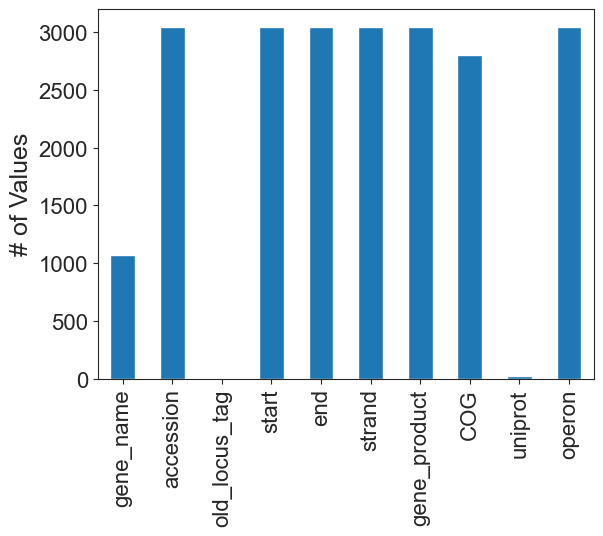

In [30]:
fig,ax = plt.subplots()
DF_annot.count().plot(kind='bar',ax=ax)
ax.set_ylabel('# of Values',fontsize=18)
ax.tick_params(labelsize=16)

## Fill missing values

Some organisms are missing gene names, so these will be filled with locus tag gene names.

In [31]:
# Fill in missing gene names with locus tag names
DF_annot['tmp_name'] = DF_annot.copy().index.tolist()
DF_annot.gene_name.fillna(DF_annot.tmp_name,inplace=True)
DF_annot.drop('tmp_name',axis=1,inplace=True)

In [44]:
# Fill missing COGs with X
DF_annot['COG'].fillna('X',inplace=True)

In [45]:
temp = DF_annot.COG.values.tolist()
temp2 = []
for i in temp:
    if i == '-' or i == 'NaN':
        temp2.append(cog2str('X'))
    else:
        temp2.append(cog2str(i))
DF_annot['COG'] = temp2

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [46]:
DF_annot

,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
locus_tag,,,,,,,,,,
cg0001,dnaA,BX927147.1,None,1.0,1575.0,+,CHROMOSOMAL REPLICATION INITIATOR PROTEIN,"Replication, recombination and repair",Q8NUD8,Op0
cg0002,cg0002,BX927147.1,None,1594.0,1920.0,-,hypothetical protein predicted by Glimmer,No COG annotation,NaN,Op1
cg0004,dnaN,BX927147.1,None,2292.0,3476.0,+,DNA POLYMERASE III%2C BETA SUBUNIT,"Replication, recombination and repair",NaN,Op0
cg0005,recF,BX927147.1,None,3585.0,4769.0,+,DNA REPAIR AND GENETIC RECOMBINATION PROTEIN,"Replication, recombination and repair",Q6M8X7,Op2
cg0006,cg0006,BX927147.1,None,4814.0,5302.0,+,CONSERVED HYPOTHETICAL PROTEIN,Function unknown,Q8NUD4,Op2
...,...,...,...,...,...,...,...,...,...,...
cg3430,cg3430,BX927147.1,None,3280996.0,3281295.0,-,conserved hypothetical protein,Function unknown,NaN,Op2048
cg3431,rnpA,BX927147.1,None,3281276.0,3281677.0,-,RNase P protein component,"Translation, ribosomal structure and biogenesis",NaN,Op2048
cg3432,rpmH,BX927147.1,None,3281717.0,3281860.0,-,50S RIBOSOMAL PROTEIN L34,"Translation, ribosomal structure and biogenesis",NaN,Op2048


 COG letters will also be converted to the full name.

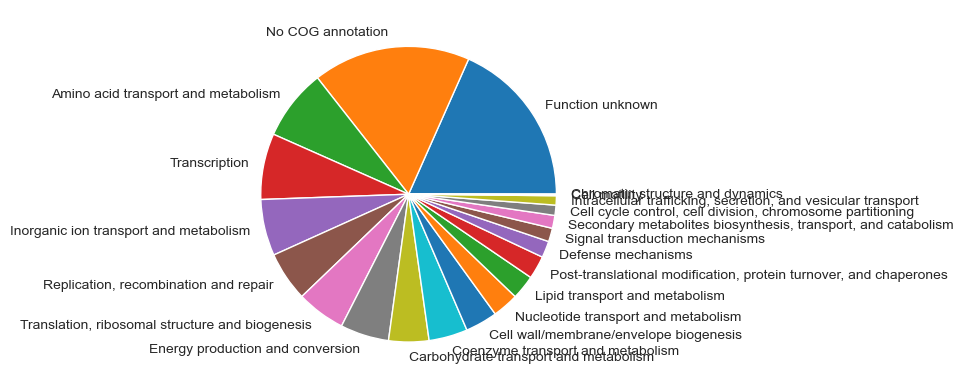

In [47]:
counts = DF_annot.COG.value_counts()
plt.pie(counts.values,labels=counts.index);

Uncomment the following line to save the gene annotation dataset

In [48]:
from pathlib import Path  
filepath = Path('/Users/louxuwen/Desktop//Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene_info.csv')  

#filepath = Path('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/7_characterizing_imodulons/Data/gene_info.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
DF_annot.to_csv(filepath)  

In [ ]:
#DF_annot.to_csv(os.path.join('..','data','processed_data','gene_info.csv'))

## GO Annotations

To start, download the GO Annotations for your organism from AmiGO 2

1. Go to [AmiGO 2](http://amigo.geneontology.org/amigo/search/annotation)
1. Filter for your organism
1. Click ``CustomDL``
1. Drag ``GO class (direct)`` to the end of your Selected Fields
1. Enter the location of your GO annotation file below and run the following code block

there is only the cgl version, not the cgb version

In [ ]:
go_file = os.path.join('..','data','external','GO_annotations.txt')

In [ ]:
DF_GO = pd.read_csv(go_file,sep='\t',header=None,usecols=[2,17])
DF_GO.columns = ['gene_name','gene_ontology']
DF_GO.head()

Convert the gene names to gene locus tags, and drop gene names that cannot be converted

In [ ]:
name2num = {v:k for k,v in DF_annot.gene_name.to_dict().items()}

In [ ]:
DF_GO['gene_id'] = [name2num[x] if x in name2num.keys() else None for x in DF_GO.gene_name]

In [ ]:
DF_GO.head()

Now we remove null entries

In [ ]:
DF_GO = DF_GO[DF_GO.gene_id.notnull()]

In [ ]:
DF_GO.head()

Uncomment the line below to save the annotations

In [ ]:
DF_GO[['gene_id','gene_name','gene_ontology']].to_csv(os.path.join('..','data','external','GO_annotations_curated.csv'))